In [47]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
import seaborn as sns

In [48]:
train=pd.read_csv('train.csv')

In [49]:
print(train.shape)

(69713, 22)


In [50]:
# binary classification
print(train['Approved'].unique())

[0 1]


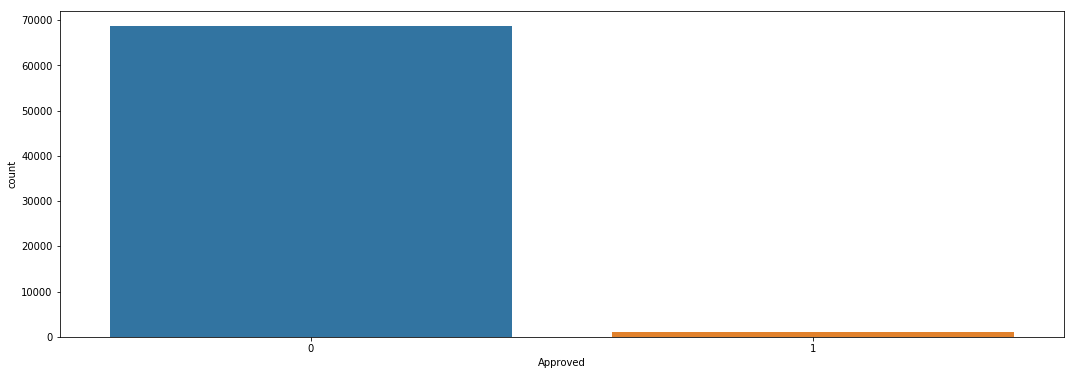

In [51]:
# Heavy class Imbalance
sns.countplot(train['Approved'])

In [52]:
# 68:1
print(train['Approved'].value_counts())

0    68693
1     1020
Name: Approved, dtype: int64


In [53]:
cols=['ID','Employer_Code','DOB','Lead_Creation_Date']
train=train.drop(cols,axis=1)

In [54]:
train.columns

Index(['Gender', 'City_Code', 'City_Category', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [55]:
# Divide into categorical and continuous data
cont=['Monthly_Income','Existing_EMI','Loan_Amount','Interest_Rate','EMI']
cat=['Gender', 'City_Code', 'City_Category', 'Employer_Category1','Employer_Category2','Customer_Existing_Primary_Bank_Code','Primary_Bank_Type','Contacted','Source', 'Source_Category','Loan_Period','Var1','Approved']

In [56]:
# Skewness of the distribution
print(train[cont].skew())

Monthly_Income    168.415068
Existing_EMI      194.930553
Loan_Amount         2.100643
Interest_Rate       1.424562
EMI                 2.673024
dtype: float64


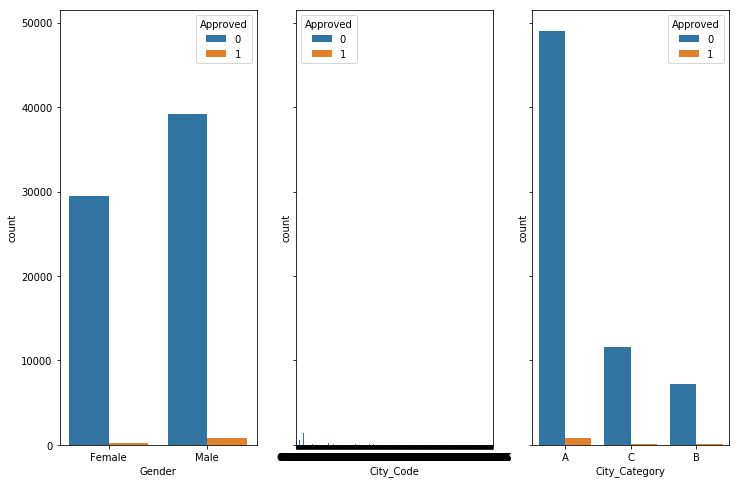

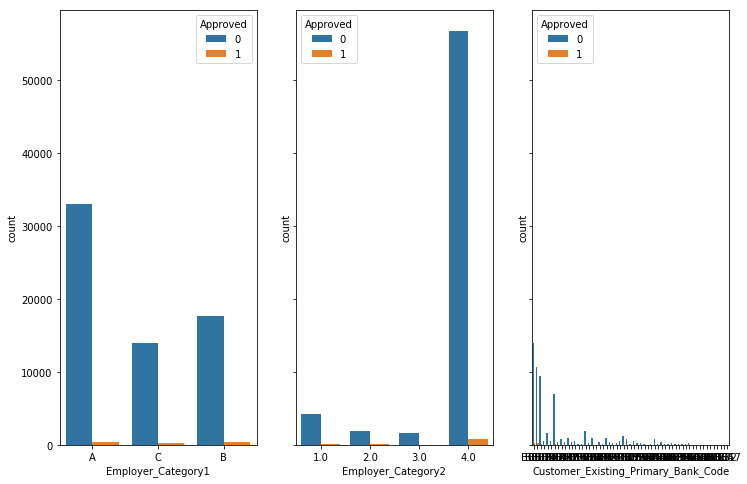

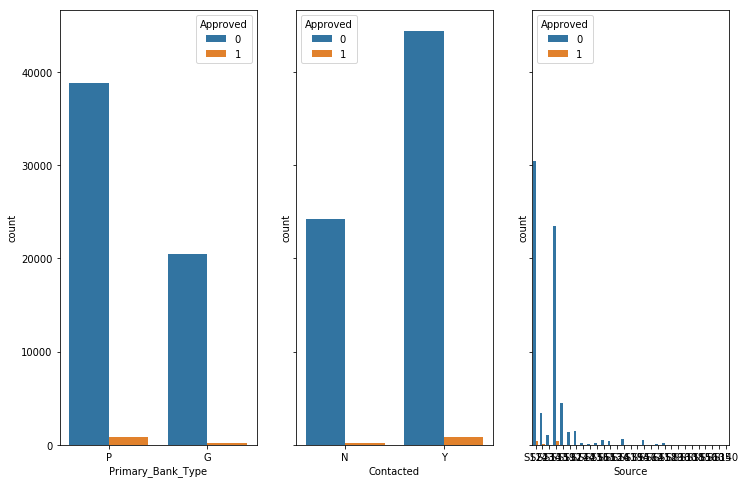

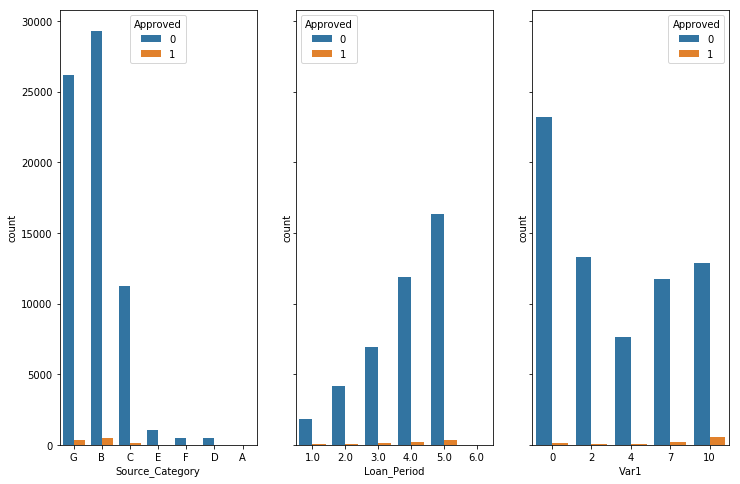

In [57]:
# Count of each label in each category

#names of all the columns
cols = train[cat].columns

#Plot count plot for all attributes in a 3*3 grid
n_cols = 3
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train[cat], ax=ax[j],hue='Approved')

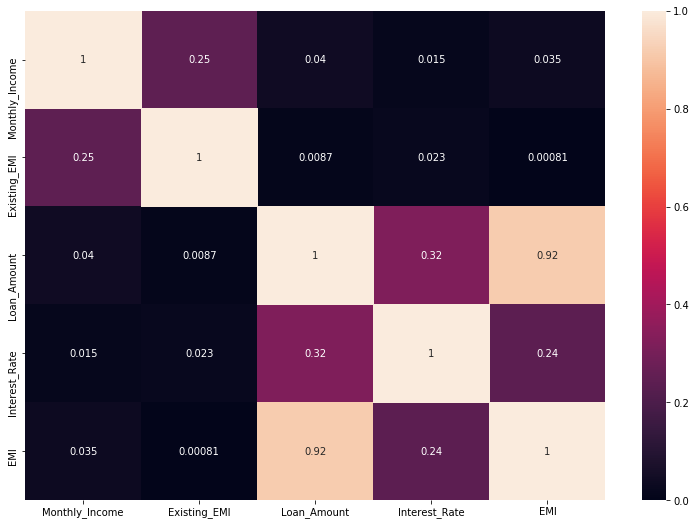

In [58]:
# Correlation among continuous variables
correlationMatrix = train[cont].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

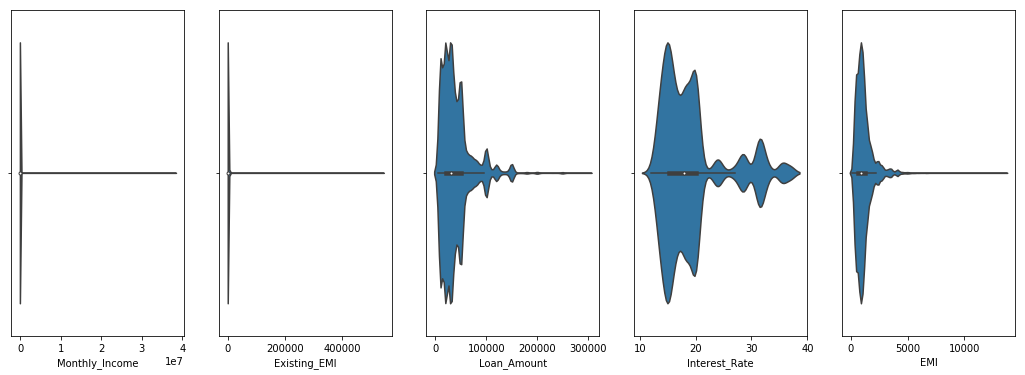

In [59]:
#number of features considered
n_cols = 5
n_rows = 1
#dataframe with only continuous features
data=train[cont]

#get the names of all the columns
cols=train[cont].columns 
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(18, 6))
    for j in range(n_cols):
        try:
            sns.violinplot(train[cols[i*n_cols+j]].dropna(), ax=ax[j])
        except:
            pass